In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [6]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

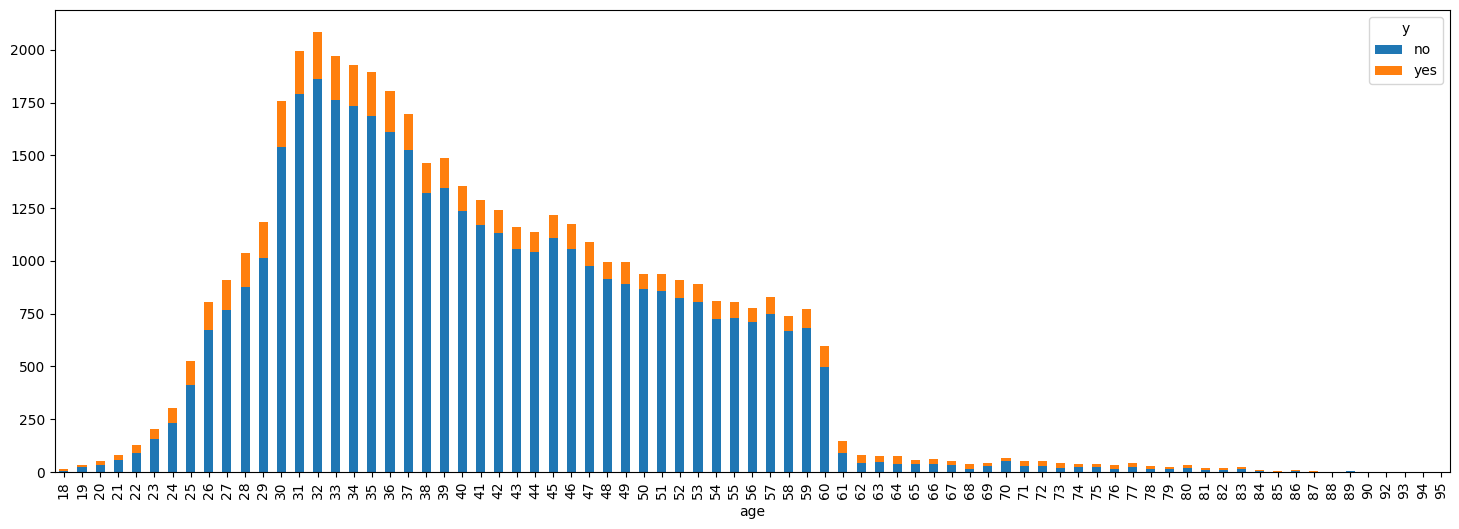

In [20]:
grouped_data = df.groupby('age')['y'].value_counts()
grouped_data
age_unstacked=grouped_data.unstack()
age_unstacked.plot(kind='bar',figsize=(18,6), stacked=True)
plt.xlabel('Age')
plt.ylabel('Target')
plt.legend(title='y')
plt.show()

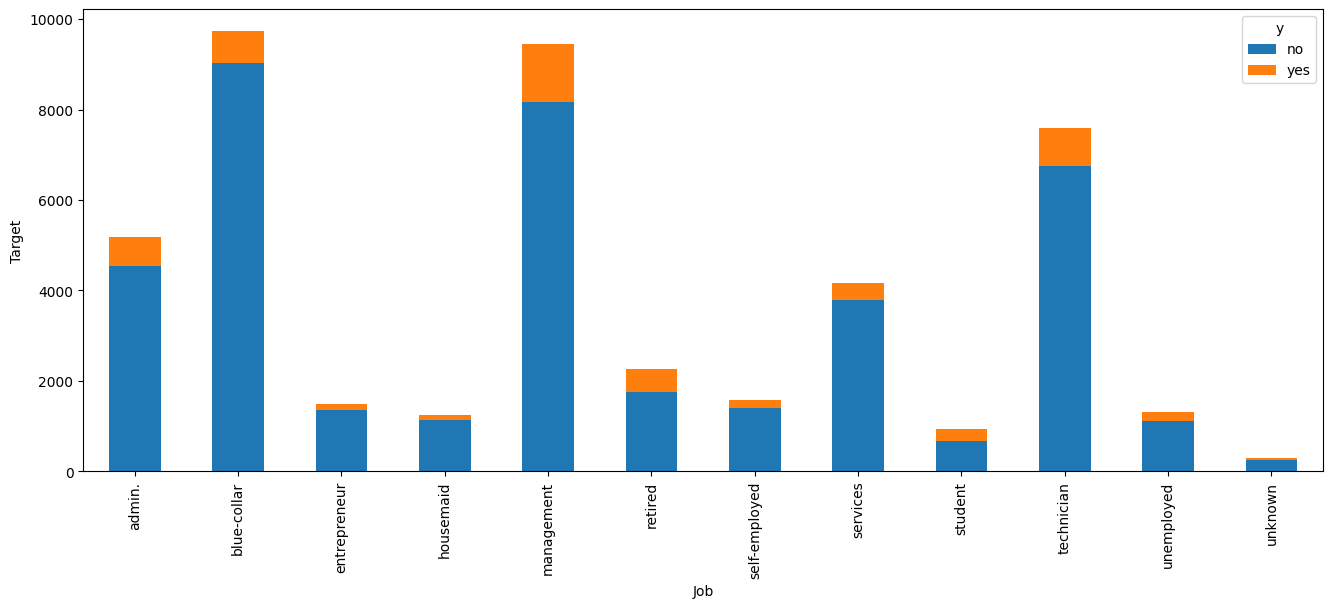

In [31]:
grouped_job = df.groupby('job')['y'].value_counts()
unstack_group = grouped_job.unstack()
unstack_group.plot(kind='bar',figsize=(16,6), stacked=True)
plt.xlabel('Job')
plt.ylabel('Target')
plt.legend(title='y')
plt.show()

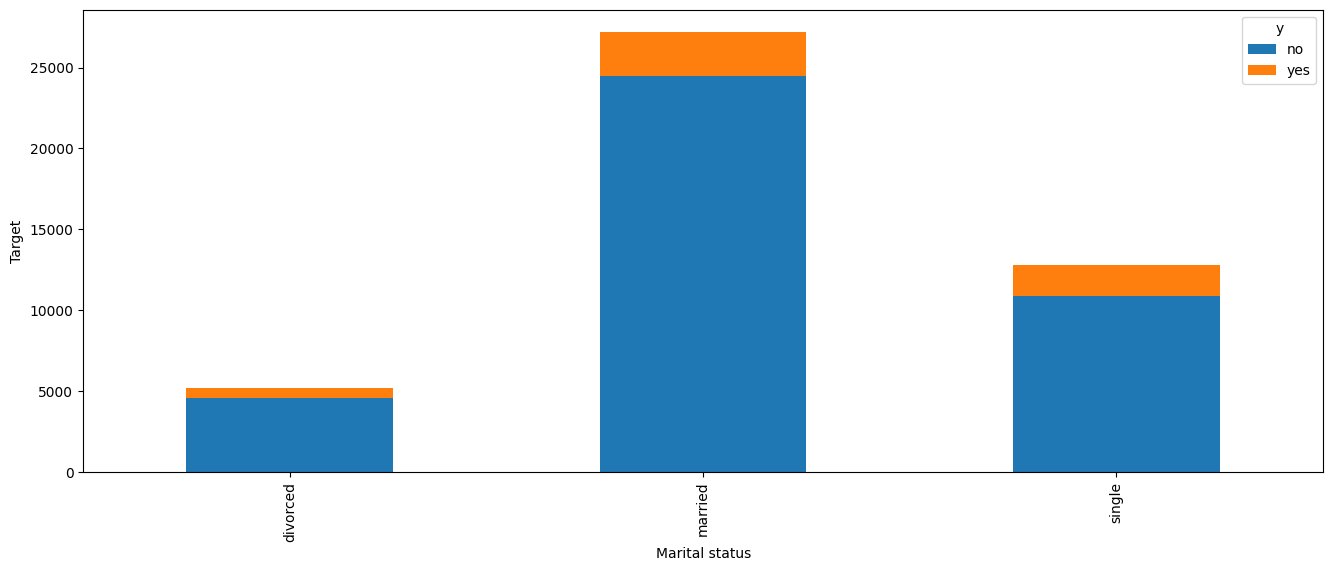

In [39]:
grouped_marital = df.groupby('marital')['y'].value_counts()
unstacked_marital = grouped_marital.unstack()
unstacked_marital.plot(kind='bar',figsize=(16,6),stacked=True)
plt.xlabel('Marital status')
plt.ylabel('Target')
plt.legend(title='y')
plt.show()

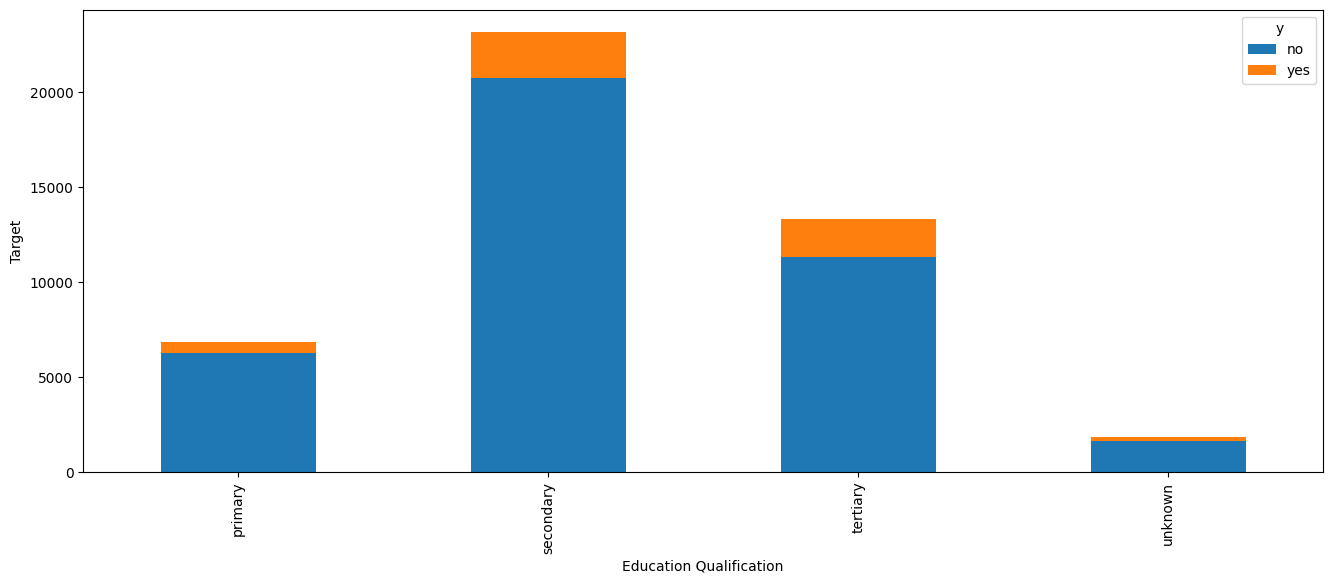

In [43]:
#Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon','dur', 'num_calls', 'prev_outcome', 'y'],
grouped_edu = df.groupby('education_qual')['y'].value_counts()
unstack_edu = grouped_edu.unstack()
unstack_edu.plot(kind='bar',figsize=(16,6), stacked=True)
plt.xlabel('Education Qualification')
plt.ylabel('Target')
plt.legend(title='y')
plt.show()

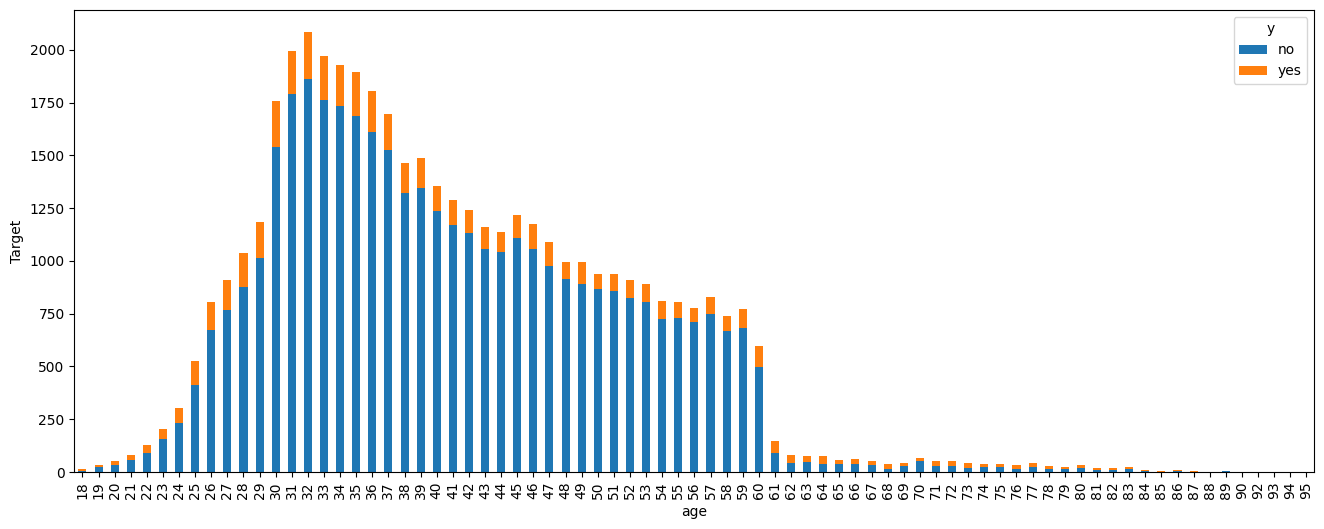

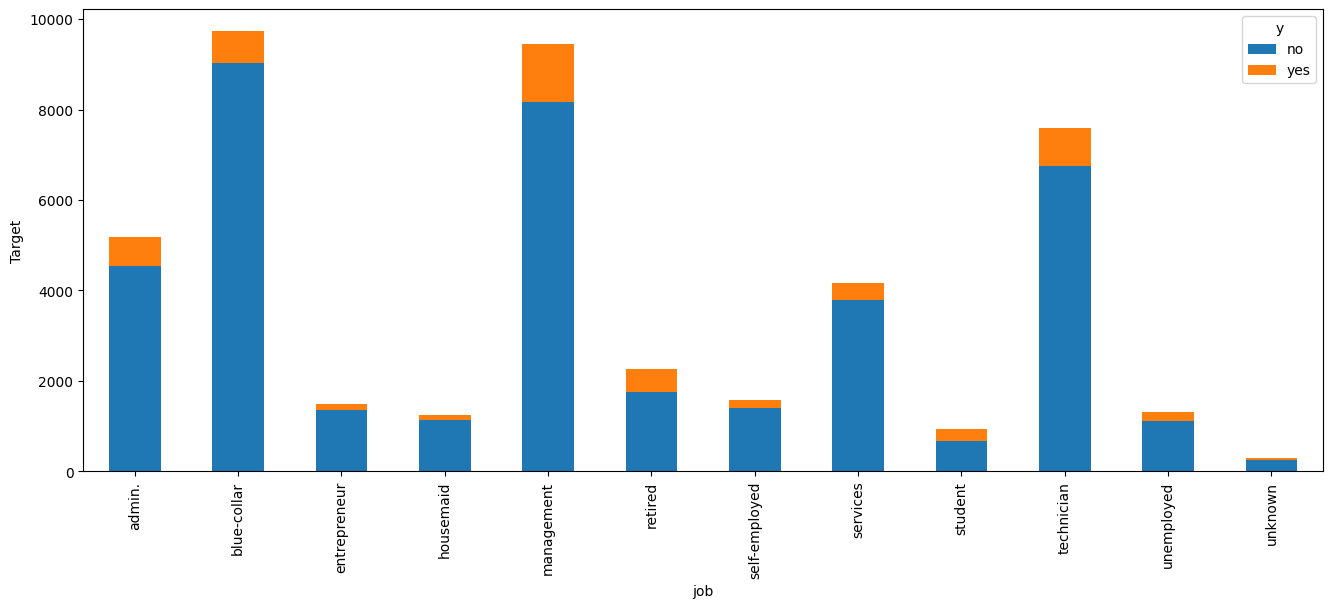

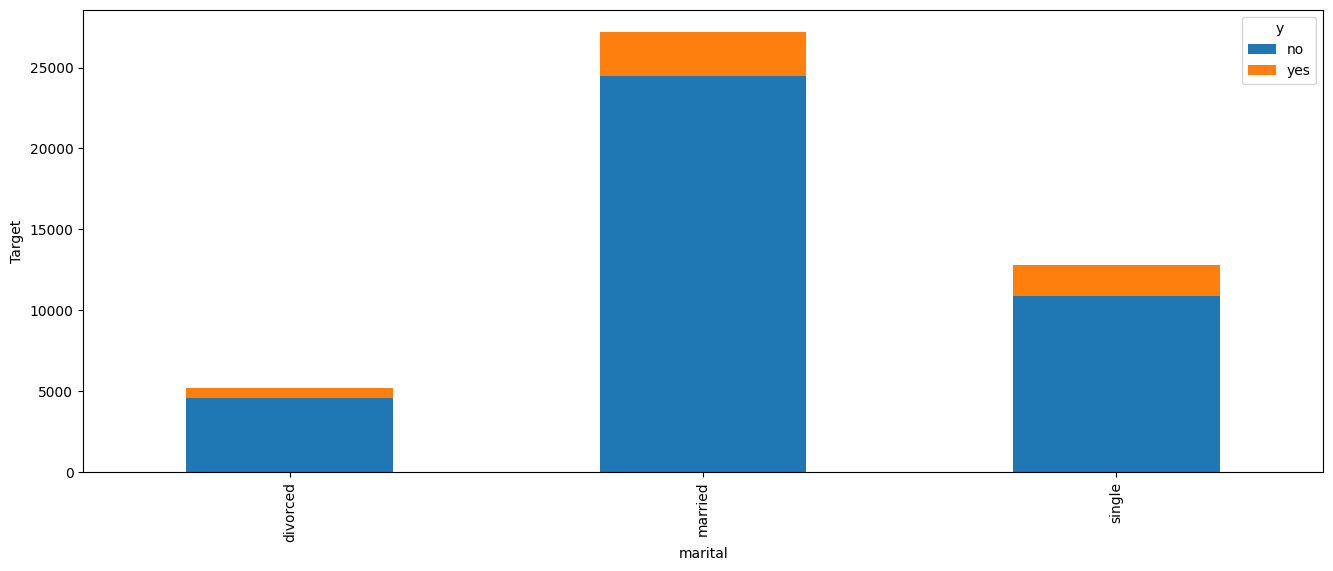

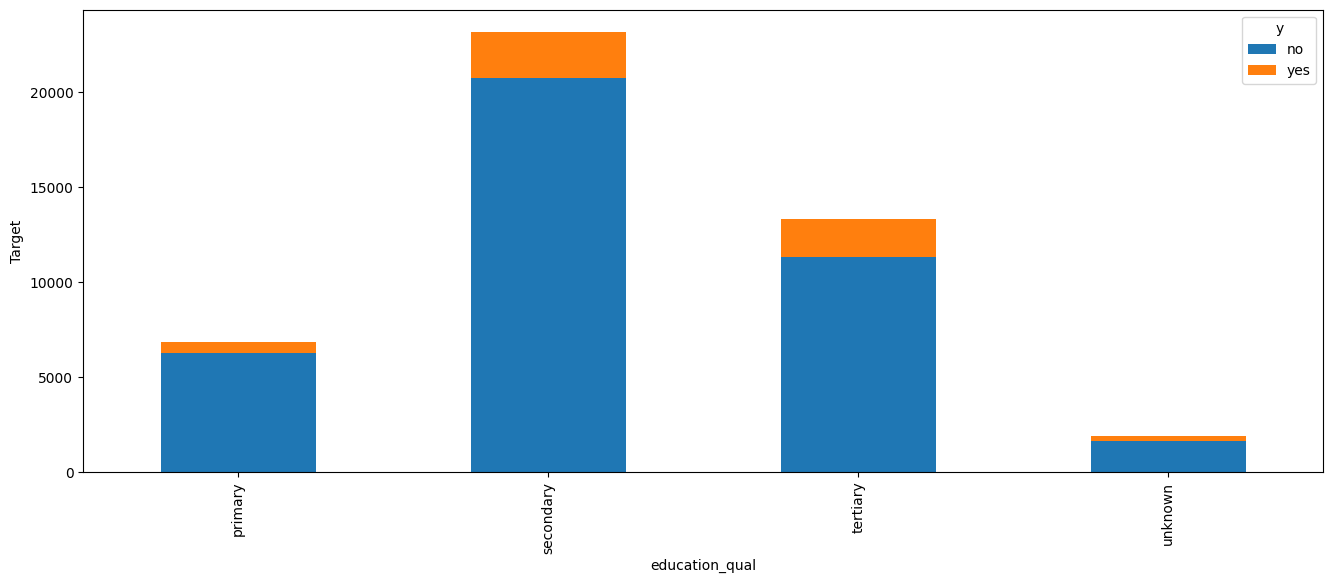

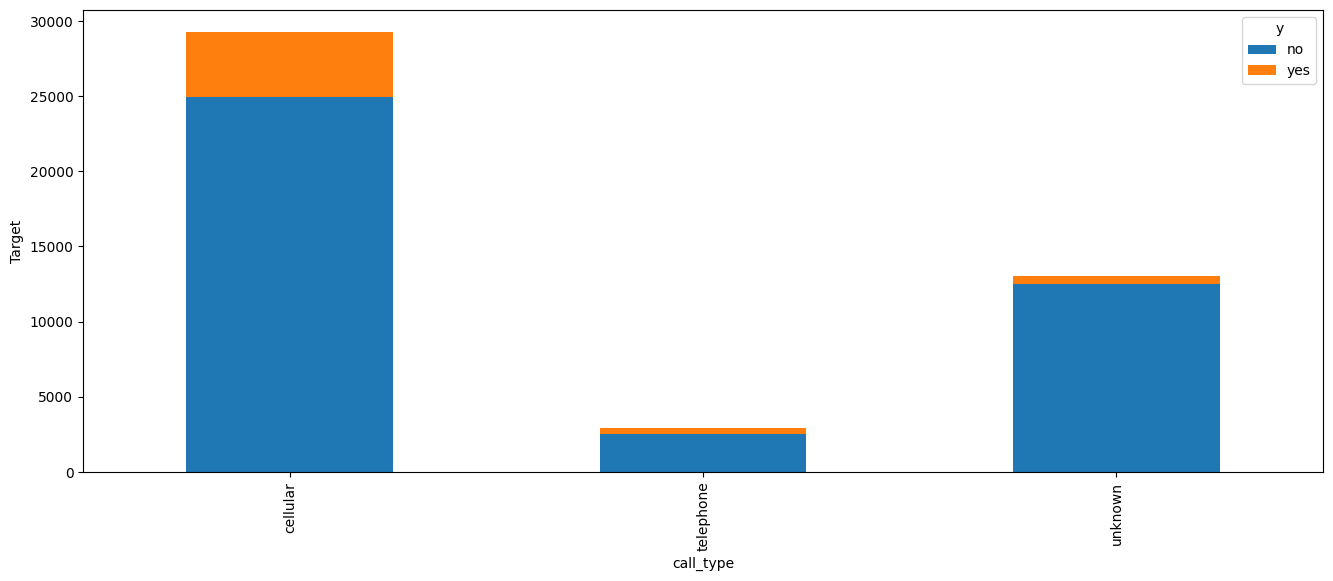

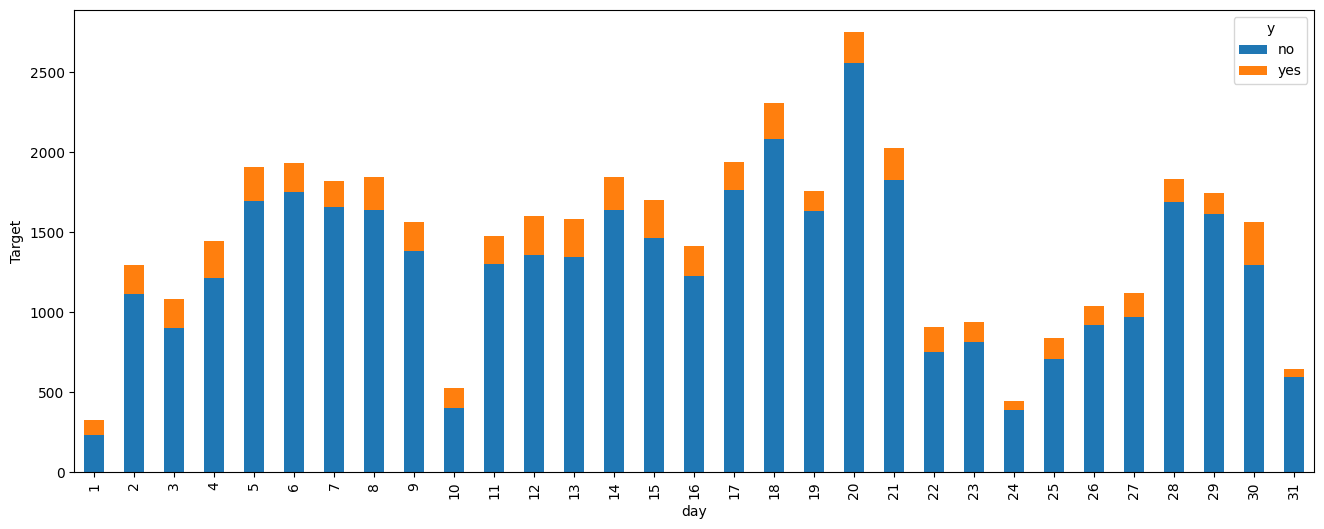

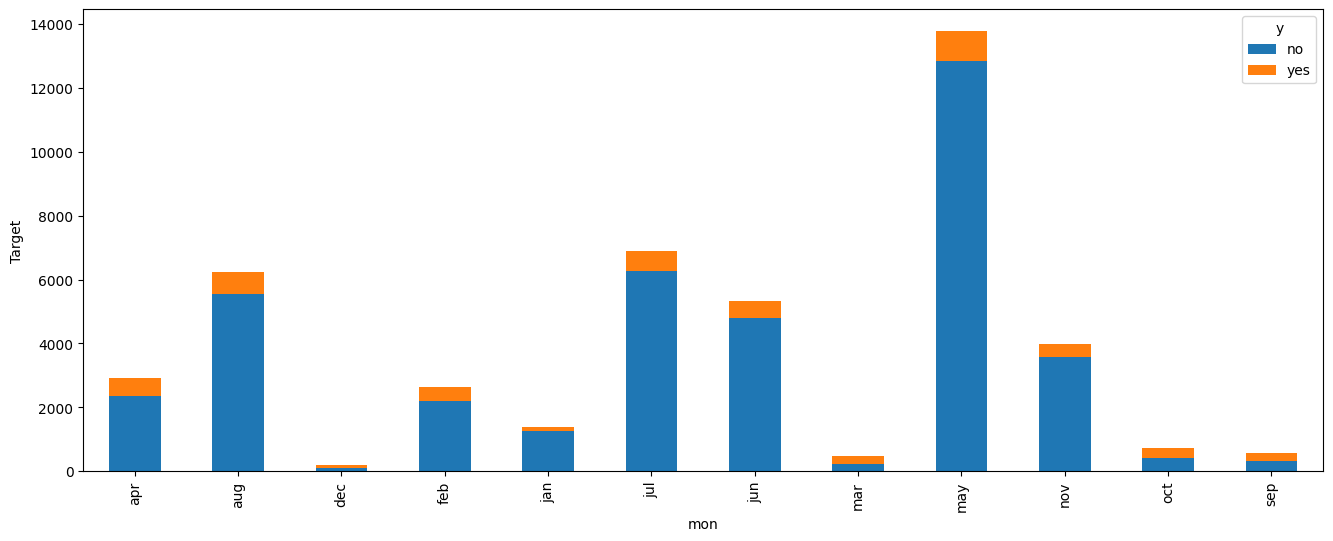

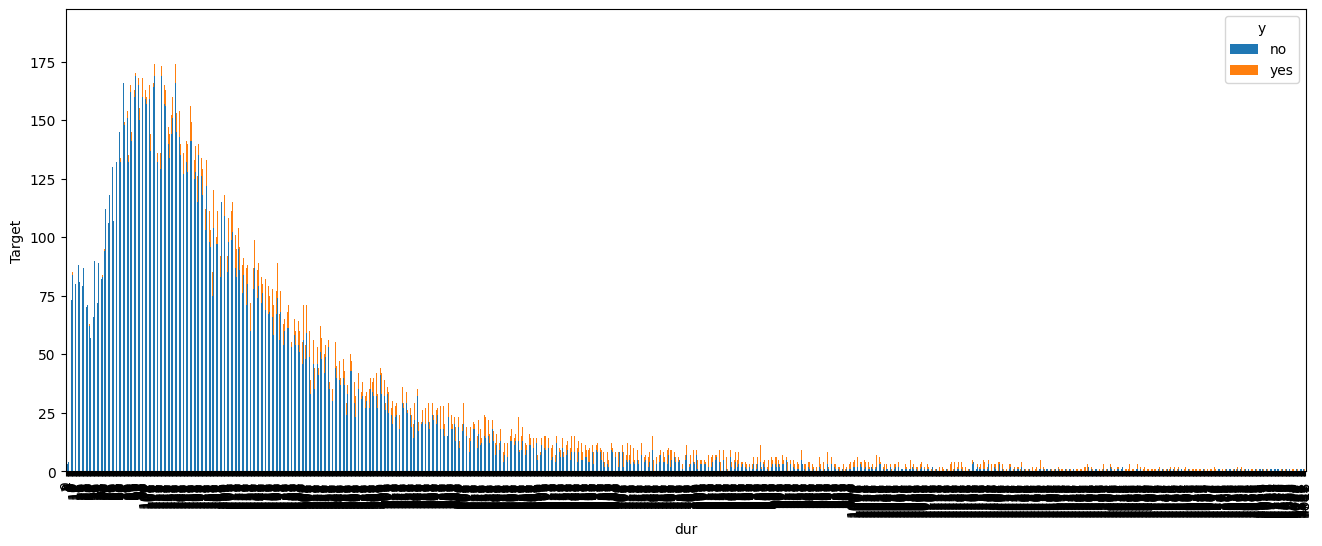

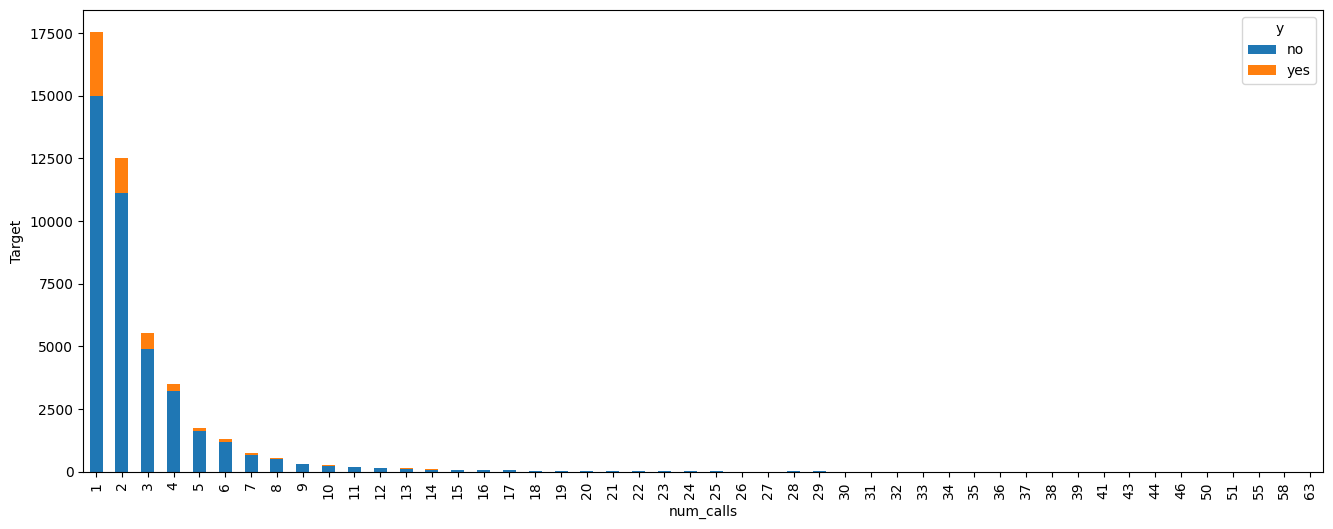

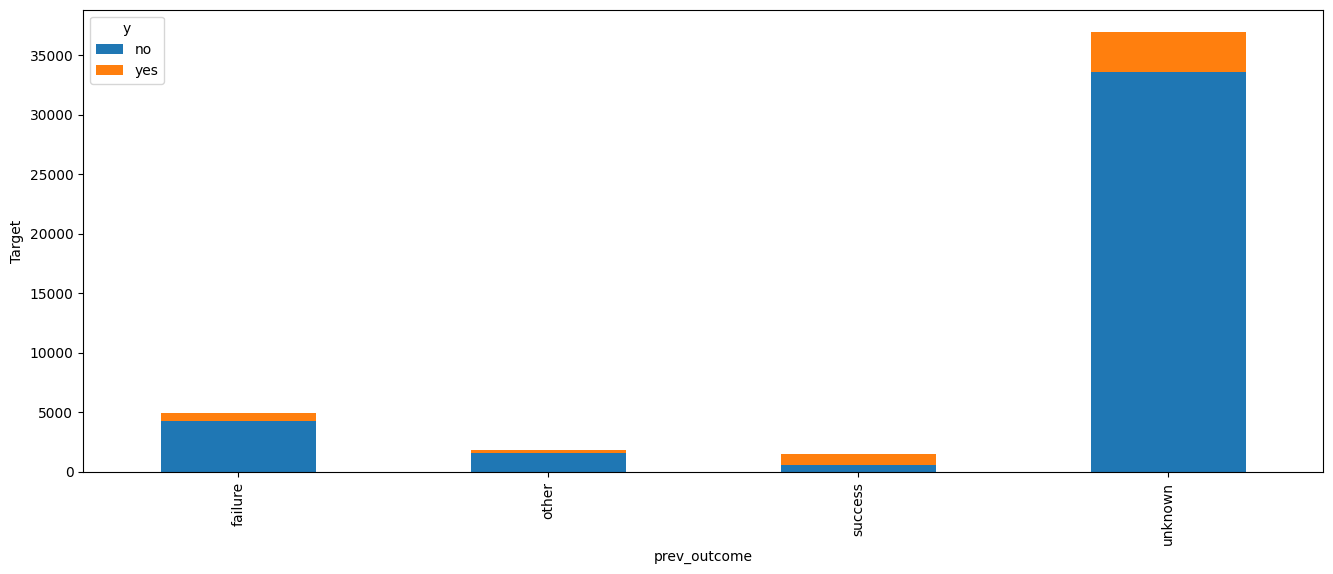

In [46]:
for i in df.columns:
    if i != 'y':
        grouped_data = df.groupby(i)['y'].value_counts()
        unstack_data = grouped_data.unstack()
        unstack_data.plot(kind='bar',figsize=(16,6), stacked=True)
        plt.xlabel(i)
        plt.ylabel('Target')
        plt.legend(title='y')
        plt.show()

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

C:\Users\yogm\AppData\Local\Temp\ipykernel_48740\3609828895.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_value = df.corr()


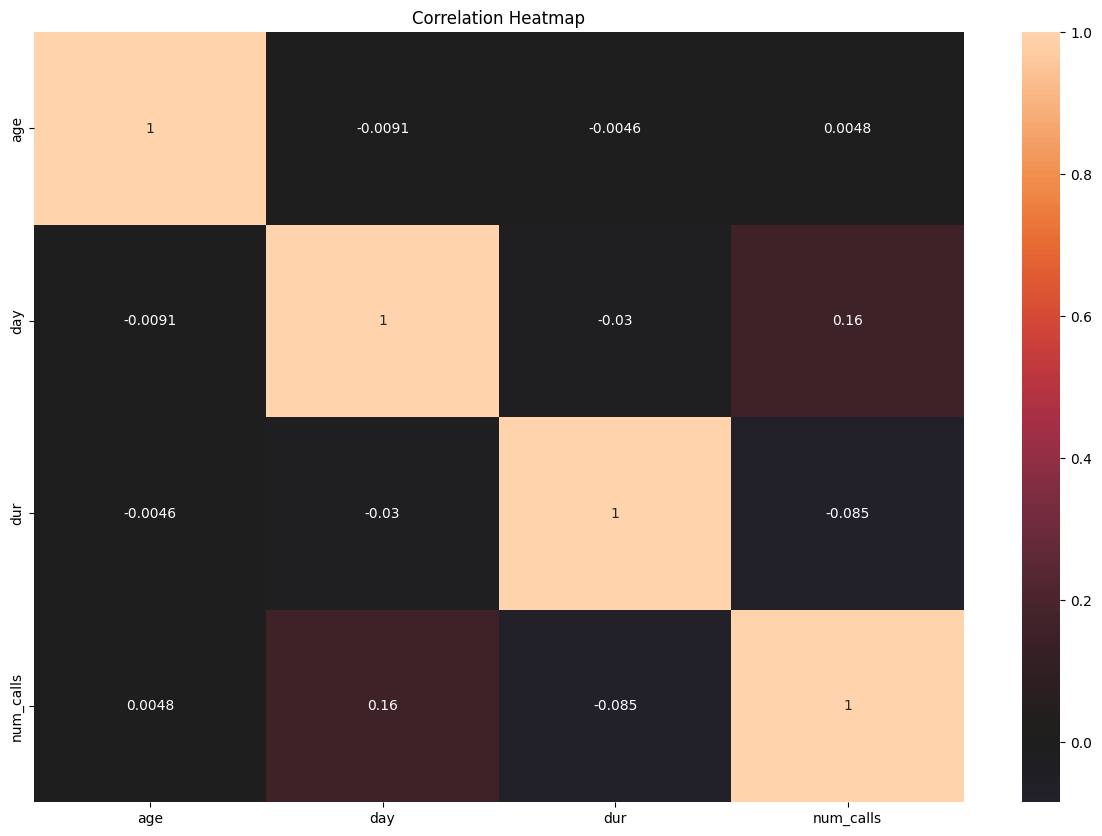

In [48]:
correlation_value = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_value,annot=True,center=0)
plt.title('Correlation Heatmap')
plt.show()

In [49]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [51]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [53]:
df['job'] = df['job'].str.replace('unknown','blue-collar')

In [54]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [55]:
df['job'] = df['job'].map({'blue-collar':1, 'management':2, 'technician':3, 'admin.':4, 'services':5, 'retired':6,
                          'self-employed':7,'entrepreneur':8, 'unemployed':9, 'housemaid':10, 'student':11})

In [56]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [57]:
df['marital'] = df['marital'].map({'married':1, 'single':2, 'divorced':3})

In [59]:
df['marital'].value_counts()

1    27214
2    12790
3     5207
Name: marital, dtype: int64

In [60]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [66]:
df['education_qual'] = df['education_qual'].str.replace('education_qual','secondary')

In [67]:
df['education_qual'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [68]:
df['education_qual'] = df['education_qual'].map({'primary':1, 'secondary':2, 'tertiary':3})

In [69]:
df['education_qual'].value_counts()

2    25059
3    13301
1     6851
Name: education_qual, dtype: int64

In [70]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [71]:
df['call_type'] = df['call_type'].map({'cellular':1, 'telephone':2, 'unknown':3})

In [73]:
df['call_type'].value_counts()

1    29285
3    13020
2     2906
Name: call_type, dtype: int64

In [74]:
df['mon'] = df['mon'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9,
                                'oct':10, 'nov':11, 'dec':12})

In [75]:
df['mon'].value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: mon, dtype: int64

In [76]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,2,1,3,3,5,5,261,1,unknown,no
1,44,3,2,2,3,5,5,151,1,unknown,no
2,33,8,1,2,3,5,5,76,1,unknown,no
3,47,1,1,2,3,5,5,92,1,unknown,no
4,33,1,2,2,3,5,5,198,1,unknown,no


In [77]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [78]:
df['prev_outcome'] = df['prev_outcome'].map({'unknown':1, 'failure':2, 'other':3, 'success':4})

In [80]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,2,1,3,3,5,5,261,1,1,no
1,44,3,2,2,3,5,5,151,1,1,no
2,33,8,1,2,3,5,5,76,1,1,no
3,47,1,1,2,3,5,5,92,1,1,no
4,33,1,2,2,3,5,5,198,1,1,no


In [ ]:
df['target']=df['target'].map({'yes':1, 'no':0})

In [82]:
df['target'] = df['y']

In [83]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,targer,target
0,58,2,1,3,3,5,5,261,1,1,no,no,no
1,44,3,2,2,3,5,5,151,1,1,no,no,no
2,33,8,1,2,3,5,5,76,1,1,no,no,no
3,47,1,1,2,3,5,5,92,1,1,no,no,no
4,33,1,2,2,3,5,5,198,1,1,no,no,no


In [84]:
df.drop(columns=['targer','y'], inplace=True, axis=0)

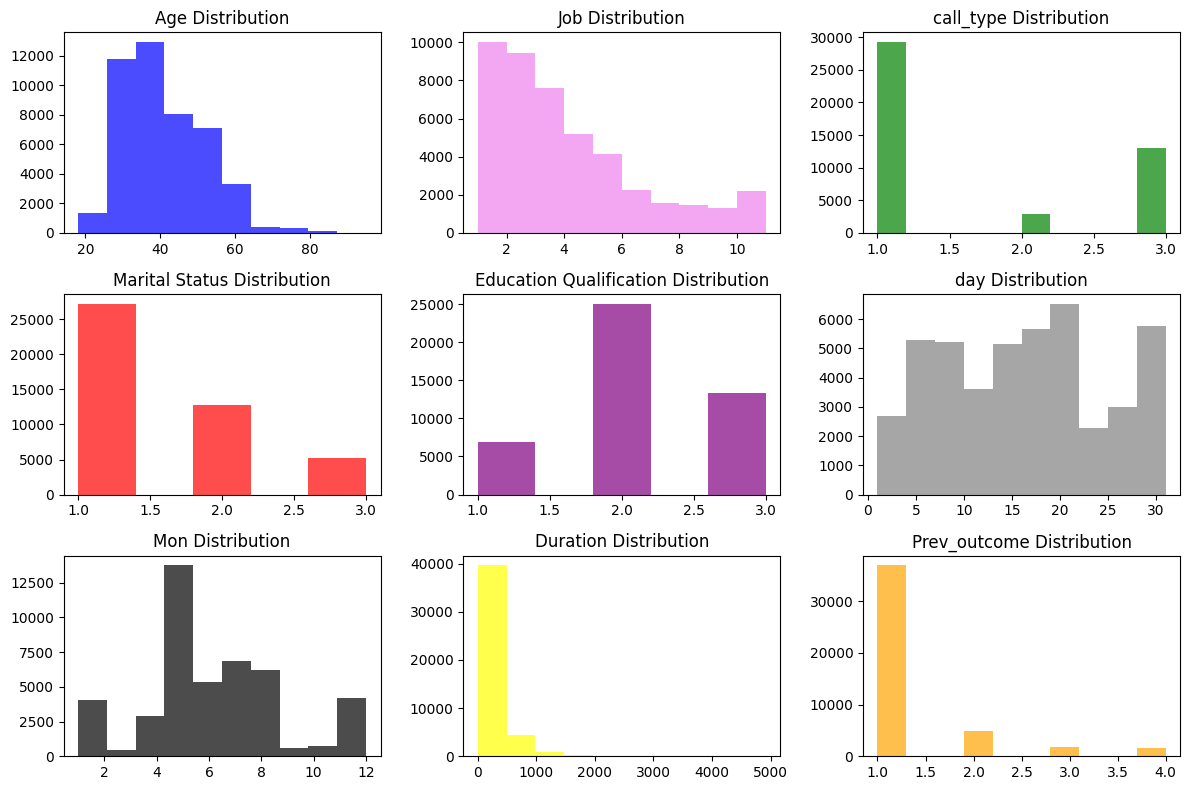

In [166]:
fig, axs = plt.subplots(3,3, figsize=(12, 8))

axs[0, 0].hist(df['age'], bins=10, color='blue', alpha=0.7)
axs[0, 0].set_title('Age Distribution')

axs[0, 1].hist(df['job'], bins=10, color='violet', alpha=0.7)
axs[0, 1].set_title('Job Distribution')

axs[0, 2].hist(df['call_type'], bins=10, color='green', alpha=0.7)
axs[0, 2].set_title('call_type Distribution')

axs[1, 0].hist(df['marital'], bins=5, color='red', alpha=0.7)
axs[1, 0].set_title('Marital Status Distribution')

axs[1, 1].hist(df['education_qual'], bins=5, color='purple', alpha=0.7)
axs[1, 1].set_title('Education Qualification Distribution')

axs[1, 2].hist(df['day'], bins=10, color='gray', alpha=0.7)
axs[1, 2].set_title('day Distribution')

axs[2, 0].hist(df['mon'], bins=10, color='black', alpha=0.7)
axs[2, 0].set_title('Mon Distribution')

axs[2, 1].hist(df['dur'], bins=10, color='yellow', alpha=0.7)
axs[2, 1].set_title('Duration Distribution')

axs[2, 2].hist(df['prev_outcome'], bins=10, color='orange', alpha=0.7)
axs[2, 2].set_title('Prev_outcome Distribution')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

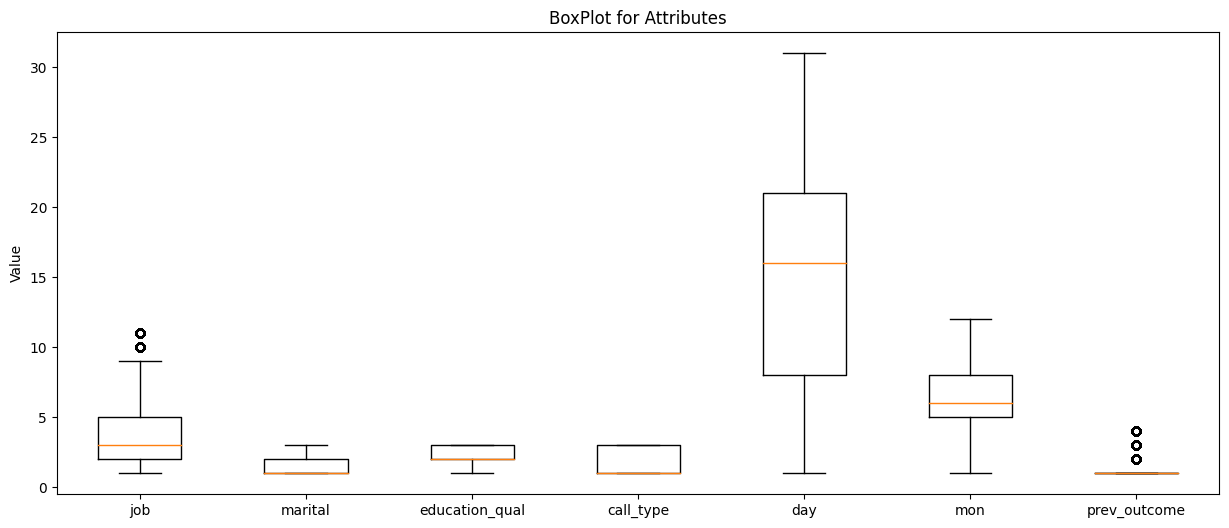

In [172]:
plt.figure(figsize=(15,6))
attributes=[]
for i in df.columns:
    if i != 'dur' and i != 'age' and i != 'num_calls' and i != 'target':
        attributes.append(i)

plt.boxplot(df[attributes], labels=attributes)
plt.title('BoxPlot for Attributes')
plt.ylabel('Value')
plt.show

In [ ]:
plt.figure(figsize=(10, 6))

attributes = ['age', 'job', 'marital', 'education_qual']
plt.boxplot(data1[attributes], labels=attributes)
plt.title('Box Plots for Attributes')
plt.ylabel('Value')
plt.show()


In [85]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,2,1,3,3,5,5,261,1,1,no
1,44,3,2,2,3,5,5,151,1,1,no
2,33,8,1,2,3,5,5,76,1,1,no
3,47,1,1,2,3,5,5,92,1,1,no
4,33,1,2,2,3,5,5,198,1,1,no


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x = df.drop('target',axis=1)

In [132]:
y = df['target']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [134]:
x_train.shape

(31647, 10)

In [135]:
x_test.shape

(13564, 10)

In [136]:
y_train.shape

(31647,)

In [137]:
y_test.shape

(13564,)

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
model = RandomForestClassifier()

In [140]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [141]:
importance = model.feature_importances_

In [142]:
importance

array([0.1422849 , 0.06392344, 0.02577521, 0.02738224, 0.02703028,
       0.13227346, 0.09647614, 0.3325843 , 0.04871176, 0.10355826])

In [143]:
importance.argsort()[::-1]

array([7, 0, 5, 9, 6, 1, 8, 3, 4, 2], dtype=int64)

In [144]:
sorted_indices = importance.argsort()[::-1]
sorted_importances = importance[sorted_indices]
sorted_feature_names = x.columns[sorted_indices]

In [145]:
sorted_feature_names

Index(['dur', 'age', 'day', 'prev_outcome', 'mon', 'job', 'num_calls',
       'education_qual', 'call_type', 'marital'],
      dtype='object')

In [146]:
sorted_importances

array([0.3325843 , 0.1422849 , 0.13227346, 0.10355826, 0.09647614,
       0.06392344, 0.04871176, 0.02738224, 0.02703028, 0.02577521])

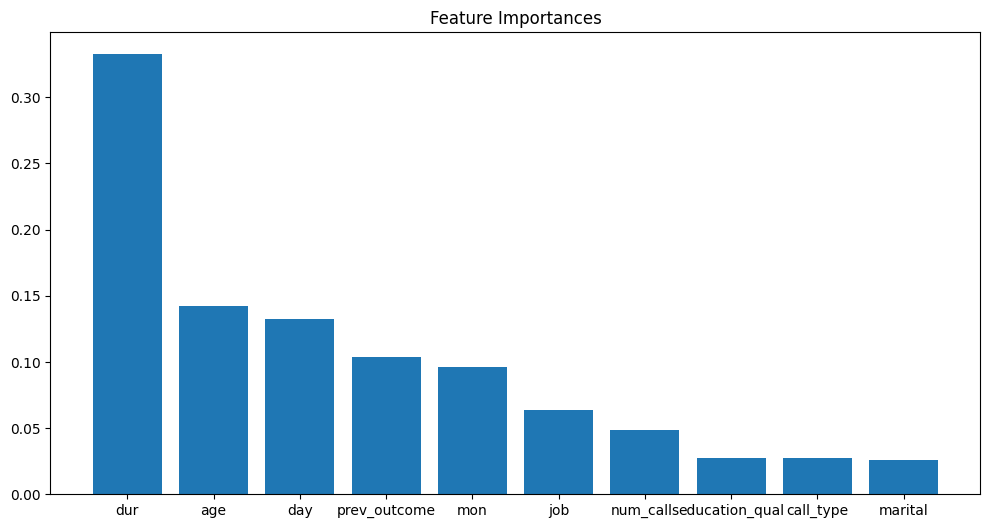

In [147]:
plt.figure(figsize=(12, 6))
plt.bar(range(x.shape[1]), sorted_importances)
plt.xticks(range(x.shape[1]), sorted_feature_names)
plt.title("Feature Importances")
plt.show()

In [148]:
from sklearn.linear_model import LogisticRegression


In [149]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

C:\Users\yogm\AppData\Local\anaconda3\envs\guvi\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
y_pred = model.predict(x_test)

In [151]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [156]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.903420819817163

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [176]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

In [181]:
from sklearn.model_selection import cross_val_score, train_test_split
results = []
for name, classifier in classifiers:
    cv_scores = cross_val_score(classifier, x_train, y_train, cv=5, scoring='accuracy')
    results.append((name, cv_scores.mean(), cv_scores.std()))

C:\Users\yogm\AppData\Local\anaconda3\envs\guvi\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yogm\AppData\Local\anaconda3\envs\guvi\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [182]:
results

[('Logistic Regression', 0.8913011222195681, 0.0029018942606271027),
 ('Decision Tree', 0.8700351924502098, 0.0032155810717533566),
 ('Random Forest', 0.9027713748768489, 0.002884117751574766),
 ('K-Nearest Neighbors', 0.8820742703226478, 0.0027352602113554993)]

In [183]:
for i in range(0, len(results)):
    print(i)

0
1
2
3
